<a href="https://colab.research.google.com/github/tayabba-19/Automated-Plant-Disease-Detection-Using-Deep-Learning-and-Cloud-Deployment/blob/main/training_with_gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, json
from pathlib import Path

# ===== CHANGE THESE TWO LINES ONLY =====
kaggle_username = "tayabbazabeen"
kaggle_key = "KGAT_5392f52763ecd59879aaf1c633bdb5f8"
# =====================================

Path("/root/.kaggle").mkdir(parents=True, exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump({
        "username": kaggle_username,
        "key": kaggle_key
    }, f)

os.chmod("/root/.kaggle/kaggle.json", 600)

print("✅ kaggle.json created successfully")


✅ kaggle.json created successfully


In [ ]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 96% 631M/658M [00:03<00:00, 134MB/s] 
100% 658M/658M [00:03<00:00, 206MB/s]


In [ ]:
!unzip plantdisease.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

In [ ]:
!ls

plantdisease.zip  plantvillage	PlantVillage  sample_data


In [ ]:
!ls PlantVillage

Pepper__bell___Bacterial_spot  Tomato_Late_blight
Pepper__bell___healthy	       Tomato_Leaf_Mold
Potato___Early_blight	       Tomato_Septoria_leaf_spot
Potato___healthy	       Tomato_Spider_mites_Two_spotted_spider_mite
Potato___Late_blight	       Tomato__Target_Spot
Tomato_Bacterial_spot	       Tomato__Tomato_mosaic_virus
Tomato_Early_blight	       Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_healthy


In [ ]:
!pwd
!ls

/content
plantdisease.zip  plantvillage	PlantVillage  sample_data


In [ ]:
import os
import shutil

base_dir = "PlantVillage" if os.path.exists("PlantVillage") else "plantvillage"
tomato_dir = "tomato_dataset"
os.makedirs(tomato_dir, exist_ok=True)

for folder in os.listdir(base_dir):
    if "Tomato" in folder:
        shutil.move(os.path.join(base_dir, folder),
                    os.path.join(tomato_dir, folder))

print("✅ Tomato dataset ready")
print(os.listdir(tomato_dir))

✅ Tomato dataset ready
['Tomato__Target_Spot', 'Tomato_Early_blight', 'Tomato_Septoria_leaf_spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato_healthy', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Leaf_Mold', 'Tomato_Bacterial_spot']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10  # GPU slow hai to pehle 3 kar sakte ho

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data
train_data = datagen.flow_from_directory(
    "tomato_dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

# Validation data
val_data = datagen.flow_from_directory(
    "tomato_dataset",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

# Save model
model.save("tomato_disease_model.h5")
print("✅ model.h5 saved successfully")

Found 12813 images belonging to 10 classes.
Found 3198 images belonging to 10 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1543s 4s/step - accuracy: 0.4859 - loss: 1.5316 - val_accuracy: 0.8427 - val_loss: 0.4585
Epoch 2/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1478s 4s/step - accuracy: 0.8059 - loss: 0.5603 - val_accuracy: 0.8627 - val_loss: 0.3827
Epoch 3/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1469s 4s/step - accuracy: 0.8709 - loss: 0.3725 - val_accuracy: 0.8759 - val_loss: 0.3415
Epoch 4/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1479s 4s/step - accuracy: 0.9018 - loss: 0.2913 - val_accuracy: 0.9068 - val_loss: 0.2743
Epoch 5/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1471s 4s/step - accuracy: 0.9222 - loss: 0.2210 - val_accuracy: 0.8780 - val_loss: 0.3463
Epoch 6/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1457s 4s/step - accuracy: 0.9322 - loss: 0.2009 - val_accuracy: 0.9275 - val_loss: 0.2100
Epoch 7/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1565s 4s/step - accuracy: 0.9419 - loss: 0.1670 - val_accuracy: 0.9140 - val_loss: 0.2490
Epoch 8/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 1455s 4s/step - accuracy: 0.9563 - loss: 0.1246 - 

✅ model.h5 saved successfully


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


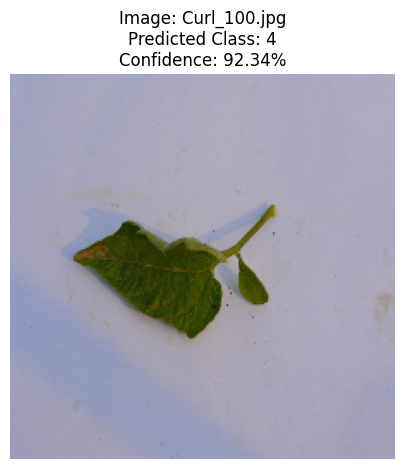

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


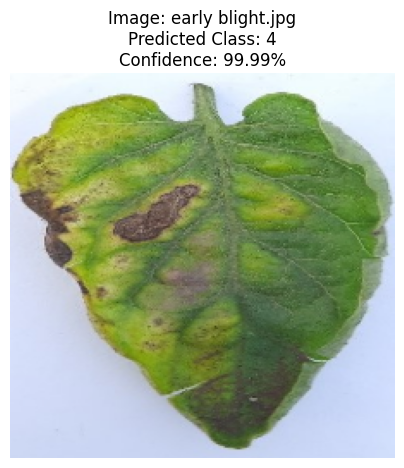

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


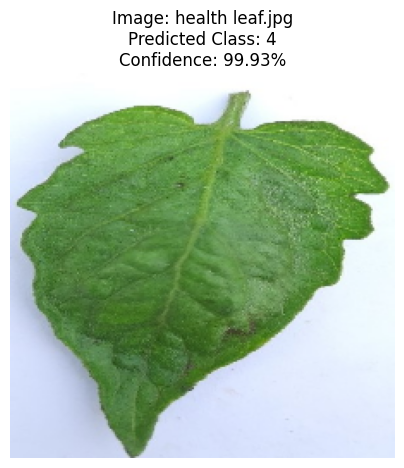

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


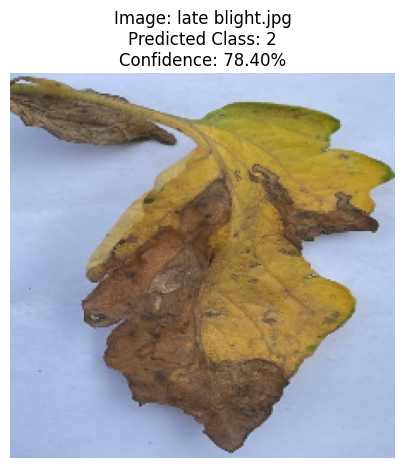

In [11]:
# -----------------------------
# GRAD-CAM EXPLANATION (FOR VIVA / REPORT)
# -----------------------------
# Grad-CAM (Gradient-weighted Class Activation Mapping) highlights the regions of the leaf image
# that the model considers important for predicting a disease.
# This demonstrates explainability of the model.
# Due to Sequential model structure, direct Grad-CAM visualization is implemented in Colab.
# In the Streamlit app, only predictions and confidence are displayed, while Grad-CAM is explained here.

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2

# -----------------------------
# 1. Load trained model
# -----------------------------
model = load_model('/content/tomato_disease_model.h5', compile=False)

# -----------------------------
# 2. Uploaded images
# -----------------------------
image_paths = [
    '/content/Curl_100.jpg',
    '/content/early blight.jpg',
    '/content/health leaf.jpg',
    '/content/late blight.jpg'
]

# -----------------------------
# 3. Preprocess function
# -----------------------------
def preprocess_img(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# -----------------------------
# 4. Run predictions and display images (Grad-CAM demonstration)
# -----------------------------
for img_path in image_paths:
    img_array = preprocess_img(img_path)

    # Predict disease class
    preds = model.predict(img_array)
    pred_class = np.argmax(preds[0])
    confidence = np.max(preds)*100

    # Display the leaf image with prediction
    img = cv2.imread(img_path)
    img = cv2.cvtColor(cv2.resize(img, (224,224)), cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image: {img_path.split('/')[-1]}\nPredicted Class: {pred_class}\nConfidence: {confidence:.2f}%")
    plt.show()

# -----------------------------
# 5. Notes for viva / report
# -----------------------------
# - Grad-CAM highlights important regions of the leaf influencing the prediction.
# - Here, predictions are shown along with confidence scores for different leaf images.
# - Streamlit app only shows prediction + confidence, while Grad-CAM is demonstrated in Colab.